In [146]:
!pip install tensorflow matplotlib opencv-python pydot

In [246]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [26]:
path = 'Data/chest_xray/chest_xray/train'

In [28]:
classes=os.listdir(path)

In [30]:
classes

['.DS_Store', 'PNEUMONIA', 'NORMAL']

In [34]:
pneumonia_dir = os.path.join(path + '/' + classes[1])
normal_dir = os.path.join(path + '/' + classes[2])

pneumonia_names = os.listdir(pneumonia_dir)
normal_names = os.listdir(normal_dir)
 
print('There are ', len(pneumonia_names),
      'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')

There are  3877 images of pneumonia infected in training dataset
There are  1342 normal images in training dataset


In [508]:
train = keras.utils.image_dataset_from_directory(
	directory='Data/chest_xray/chest_xray/train',
	labels="inferred",
	label_mode="categorical",
	batch_size=25,
	image_size=(256, 256))
validation = keras.utils.image_dataset_from_directory(
	directory='Data/chest_xray/chest_xray/val',
	labels="inferred",
	label_mode="categorical",
	batch_size=25,
	image_size=(256, 256))
test = keras.utils.image_dataset_from_directory(
	directory='Data/chest_xray/chest_xray/test',
	labels="inferred",
	label_mode="categorical",
	batch_size=25,
	image_size=(256, 256))


Found 5480 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


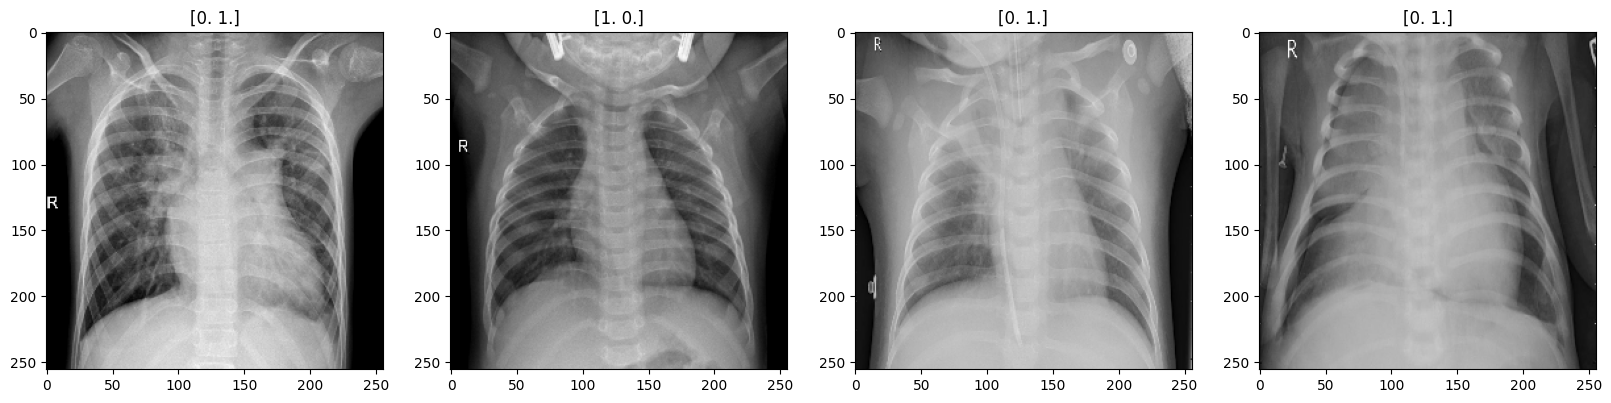

In [510]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(train_batch[1][idx])

In [512]:
train_scaled=train.map(lambda x,y:(x/255,y))
val_scaled=validation.map(lambda x,y:(x/255,y))
test_scaled=test.map(lambda x,y:(x/255,y))

In [514]:
train_iterator=train_scaled.as_numpy_iterator()
val_iterator=val_scaled.as_numpy_iterator()
test_iterator=test_scaled.as_numpy_iterator()


In [516]:
train_batch=train_iterator.next()
val_batch=train_iterator.next()
test_batch=train_iterator.next()

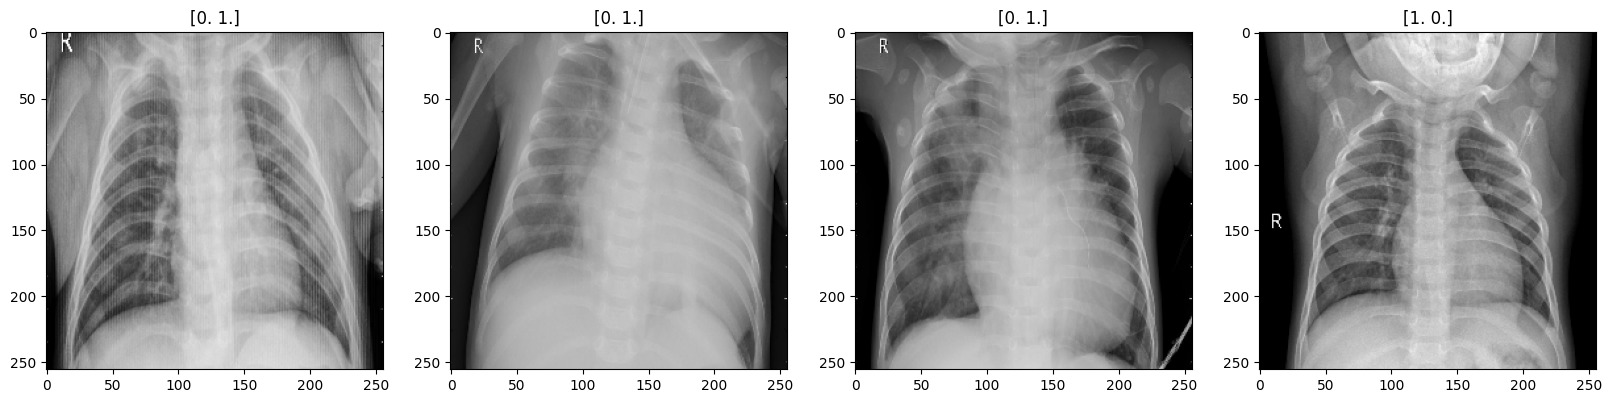

In [518]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(train_batch[1][idx])

In [520]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
 
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(2, activation='sigmoid')
])


In [522]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,313,474 (27.90 MB)

 Trainable params: 7,309,378 (27.88 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [524]:
model.compile(
	
	loss='binary_crossentropy',

	optimizer='adam',
	
	metrics=['accuracy']
)


In [526]:
logdir='newlogs'

In [528]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [530]:
history = model.fit(train,
          epochs=10,
          validation_data=validation,callbacks=[tensorboard_callback])

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 69s 311ms/step - accuracy: 0.8802 - loss: 0.3260 - val_accuracy: 0.5000 - val_loss: 3.0857
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 72s 328ms/step - accuracy: 0.9418 - loss: 0.1815 - val_accuracy: 0.5000 - val_loss: 4.3096
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 66s 302ms/step - accuracy: 0.9404 - loss: 0.1630 - val_accuracy: 0.5000 - val_loss: 2.7706
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 66s 301ms/step - accuracy: 0.9554 - loss: 0.1381 - val_accuracy: 0.6250 - val_loss: 6.0905
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 66s 301ms/step - accuracy: 0.9602 - loss: 0.1102 - val_accuracy: 0.5000 - val_loss: 6.3254
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 66s 301ms/step - accuracy: 0.9616 - loss: 0.1041 - val_accuracy: 0.5000 - val_loss: 4.3254
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 66s 302ms/step - accuracy: 0.9728 - loss: 0.0757 - val_accuracy: 0.5000 - val_loss: 8.1406
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 66s 301ms/step - accuracy: 0.9708 - loss: 0

In [532]:
history.history

{'accuracy': [0.9173357486724854,
  0.944343090057373,
  0.949999988079071,
  0.9604014754295349,
  0.9644160866737366,
  0.9649634957313538,
  0.9702554941177368,
  0.971350371837616,
  0.9729927182197571,
  0.9773722887039185],
 'loss': [0.24091917276382446,
  0.1626511663198471,
  0.14124184846878052,
  0.11821278929710388,
  0.09982915967702866,
  0.09572230279445648,
  0.0806061178445816,
  0.08296468108892441,
  0.07379757612943649,
  0.06355651468038559],
 'val_accuracy': [0.5, 0.5, 0.5, 0.625, 0.5, 0.5, 0.5, 0.8125, 0.875, 0.6875],
 'val_loss': [3.0856761932373047,
  4.3095550537109375,
  2.7705750465393066,
  6.090520858764648,
  6.325392723083496,
  4.325398921966553,
  8.140621185302734,
  1.6257946491241455,
  0.17832428216934204,
  0.7424122095108032]}

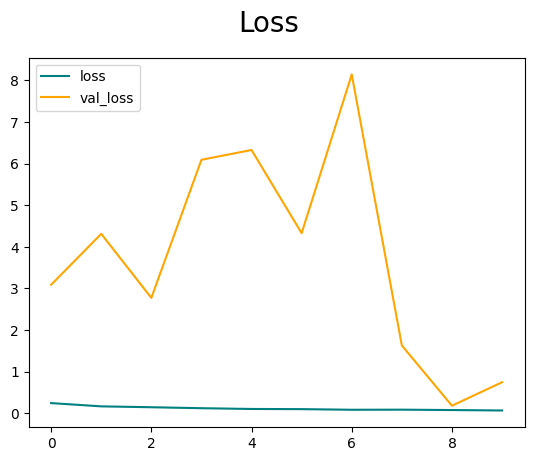

In [534]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [536]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [538]:
len(test)

25

In [540]:
loss, accuracy = model.evaluate(test)
print('The accuracy of the model on test dataset is',
      np.round(accuracy*100))

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7396 - loss: 0.9641
The accuracy of the model on test dataset is 77.0


In [3]:
test_image = tf.keras.utils.load_img(
    "Data/chest_xray/chest_xray/test/NORMAL/IM-0087-0001.jpeg",
     target_size=(256, 256))
 
# Display the loaded image
plt.imshow(test_image)
 
# Convert the loaded image into a NumPy array
# and expand its dimensions to match the
# expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
# Use the trained model to make a prediction on the input image
result = model.predict(test_image)
 
# Extract the probability of the input
# image belonging to each class from
# the prediction result
class_probabilities = result[0]
 
# Determine the class with the highest
# probability and print its label
if class_probabilities[0] > class_probabilities[1]:
    print("Normal")
else:
    print("Pneumonia")

NameError: name 'tf' is not defined

In [542]:
import cv2

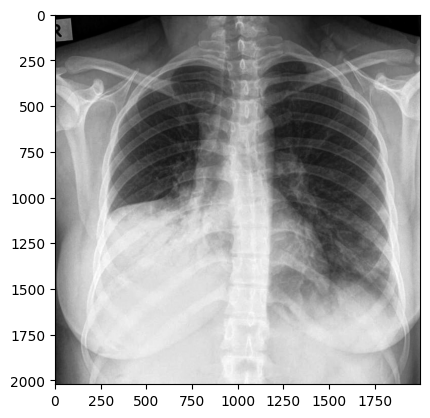

In [554]:
img=cv2.imread('test.jpg')
plt.imshow(img)
plt.show()

In [9]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

NameError: name 'tf' is not defined

In [558]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [560]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [562]:
yhat

array([[4.3755903e-27, 1.0000000e+00]], dtype=float32)